In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
img = cv2.imread('building.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)

(977, 1484)


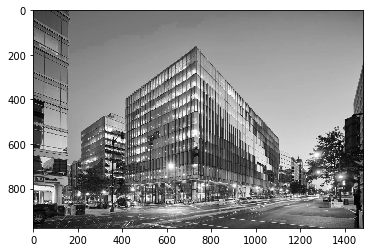

In [3]:
plt.imshow(img, cmap='gray');

In [4]:
class Conv:
    def __init__(self):
        # Sobel filter 
        self.filter_x = np.array([[-1, 0, 1], 
                                  [-2, 0, 2], 
                                  [-1, 0, 1]])
        self.filter_y = np.array([[-1, -2, -1], 
                                  [0, 0, 0], 
                                  [1, 2, 1]])

    def convolve_operations(self, image, width, height):
        copy = np.zeros((width, height))
        for i in range(1, width - 1):
            for j in range(1, height - 1):
                # convolving 
                xpix = (self.filter_x[0][0] * image[i-1][j-1]) + (self.filter_x[0][1] * image[i][j-1]) + (self.filter_x[0][2] * image[i+1][j-1]) +\
                    (self.filter_x[1][0] * image[i-1][j])   + (self.filter_x[1][1] * image[i][j])   + (self.filter_x[1][2] * image[i+1][j]) +\
                    (self.filter_x[2][0] * image[i-1][j+1]) + (self.filter_x[2][1] * image[i][j+1]) + (self.filter_x[2][2] * image[i+1][j+1])

                ypix = (self.filter_y[0][0] * image[i-1][j-1]) + (self.filter_y[0][1] * image[i][j-1]) + (self.filter_y[0][2] * image[i+1][j-1]) +\
                    (self.filter_y[1][0] * image[i-1][j])   + (self.filter_y[1][1] * image[i][j])   + (self.filter_y[1][2] * image[i+1][j]) +\
                    (self.filter_y[2][0] * image[i-1][j+1]) + (self.filter_y[2][1] * image[i][j+1]) + (self.filter_y[2][2] * image[i+1][j+1])
                
                # magnitude of vector
                mag = np.sqrt( xpix ** 2 + ypix ** 2)
                copy[i][j] = mag
        return copy

    def convolve(self, image):
        w, h = image.shape
        result = self.convolve_operations(image, w, h)
        # normalize
        result *= 255.0 / np.max(result)
        return result
        

In [5]:
conv = Conv()
result = conv.convolve(img)

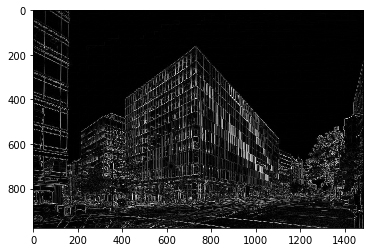

In [6]:
plt.imshow(result, cmap='gray')

# Template matching

In [7]:
img_rgb = cv2.imread('waldo.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) 

template = cv2.imread('waldo_template.jpg',0) 
w, h = template.shape[::-1] 

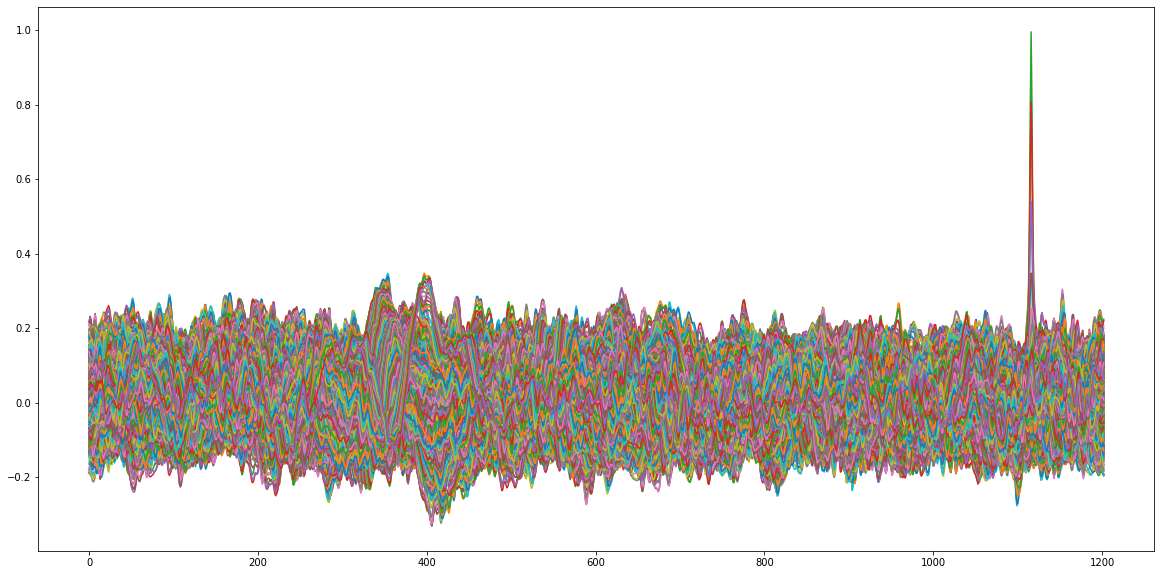

In [8]:
# Perform match operations. 
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED) 
plt.figure(figsize=(20 ,10))
plt.plot(res)
plt.show()

In [9]:
# Specify a threshold 
threshold = 0.5
# Store the coordinates of matched area in a numpy array 
loc = np.where(res >= threshold)  

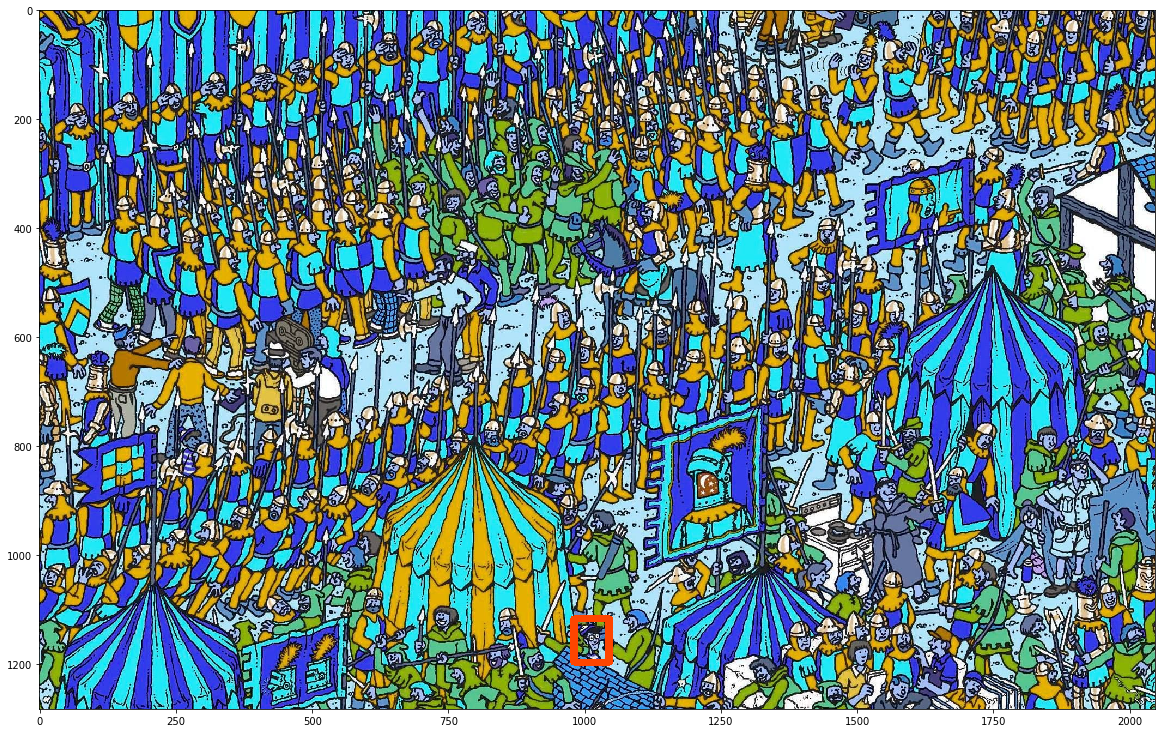

In [10]:
# Draw a rectangle around the matched region. 
for pt in zip(*loc[::-1]): 
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,69,0), 10)  
plt.figure(figsize=(20, 15))
plt.imshow(img_rgb)
plt.show()